# [타겟 넘버](https://school.programmers.co.kr/learn/courses/30/lessons/43165)
### DFS / BFS

In [ ]:
temp =[]
for _ in range(len(numbers) -2):
    plus_q.pop()
    plus_q.append(minus_q.pop())
    temp.append(plus_q)
    for _ in range(len(numbers) -2):
        plus_q.rotate(1)
        temp.append(plus_q)
# deque는 global로 적용된다.

temp

In [ ]:
numbers=[1, 1, 1, 1, 1]
target=3 #	5
numbers=[4, 1, 2, 1]
target=4 #	2

In [2]:
from collections import deque

In [67]:
plus_q = deque(['+'] * (len(numbers) - 1))
# deque(['+', '+', '+'])
minus_q = deque(['-'] * (len(numbers) - 1))
# deque(['-', '-', '-'])

In [27]:
dp = [[0] * (len(numbers) - 1) for _ in range((len(numbers) -1) * (len(numbers) -2) +2)]
dp

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

In [134]:
plus_q = deque(['+'] * (len(numbers)))
# deque(['+', '+', '+'])
minus_q = deque(['-'] * (len(numbers)))
# deque(['-', '-', '-'])

In [135]:
for _ in range(len(numbers) -1):
    plus_q.pop()
    plus_q.append(minus_q.pop())
    # eval 계산이 일어나고
    print(plus_q)
    for j in range(len(numbers) -1):
        plus_q.rotate(1)
        # eval 계산이 일어나고
        print(j, '번째 : ',plus_q)

deque(['+', '+', '+', '-'])
0 번째 :  deque(['-', '+', '+', '+'])
1 번째 :  deque(['+', '-', '+', '+'])
2 번째 :  deque(['+', '+', '-', '+'])
deque(['+', '+', '-', '-'])
0 번째 :  deque(['-', '+', '+', '-'])
1 번째 :  deque(['-', '-', '+', '+'])
2 번째 :  deque(['+', '-', '-', '+'])
deque(['+', '-', '-', '-'])
0 번째 :  deque(['-', '+', '-', '-'])
1 번째 :  deque(['-', '-', '+', '-'])
2 번째 :  deque(['-', '-', '-', '+'])


In [131]:
# 실패
# + - + -  # - + - +
# 고려 못함numbers=[4, 1, 2, 1]

plus_q = deque(['+'] * (len(numbers)))
# deque(['+', '+', '+', '+'])
minus_q = deque(['-'] * (len(numbers)))
# deque(['-', '-', '-', '-'])

cnt = 0

def evaluation(numbers, operation):
    temp = ''
    for i in range(len(operation)):
        temp += operation[i] + str(numbers[i])
    return eval(temp)

for operation in [plus_q, minus_q]:
    if evaluation(numbers, operation) == target:
        print(plus_q)
        cnt +=1


for _ in range(len(numbers) -1):
    plus_q.pop()
    plus_q.append(minus_q.pop())
    if evaluation(numbers, plus_q) == target:
        print(plus_q)
        cnt +=1

    for _ in range(len(numbers) -1):
        plus_q.rotate(1)
        if evaluation(numbers, plus_q) == target:
            print(plus_q)
            cnt +=1

cnt


deque(['+', '+', '-', '+'])


1

# [ BFS 방법](https://buzz-program.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4%ED%83%80%EA%B2%9F-%EB%84%98%EB%B2%84DFSBFS)

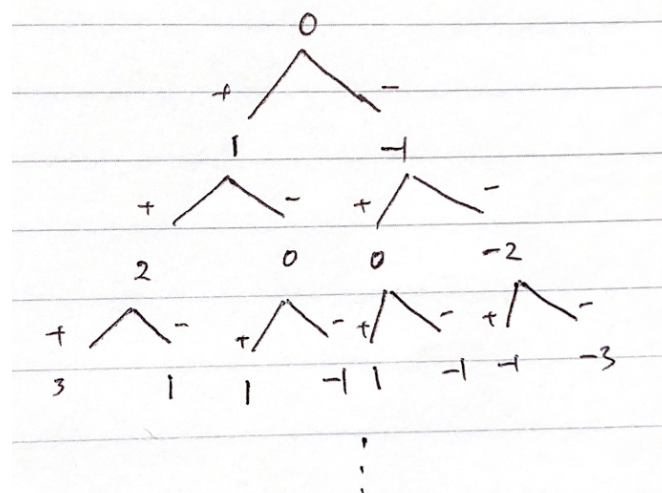

In [7]:
def solution(numbers, target):
    super_node= [0]
    for i in numbers: # [1, 1, 1, 1, 1]
        temp = []
        for j in super_node : # 2nd [1, -1]
            temp.append(j+i) # 0 + 1 -> 1 + 1, -1 + 1
            temp.append(j-i) # 0 - 1 -> 1 - 1, -1 -11
        super_node = temp
        print(super_node)
    return super_node.count(target)

In [8]:
numbers=[1, 1, 1, 1, 1]
target=3 #	5
solution(numbers, target)

[1, -1]
[2, 0, 0, -2]
[3, 1, 1, -1, 1, -1, -1, -3]
[4, 2, 2, 0, 2, 0, 0, -2, 2, 0, 0, -2, 0, -2, -2, -4]
[5, 3, 3, 1, 3, 1, 1, -1, 3, 1, 1, -1, 1, -1, -1, -3, 3, 1, 1, -1, 1, -1, -1, -3, 1, -1, -1, -3, -1, -3, -3, -5]


5

In [10]:
numbers=[4, 1, 2, 1]
target=4 #	2
solution(numbers, target)

[4, -4]
[5, 3, -3, -5]
[7, 3, 5, 1, -1, -5, -3, -7]
[8, 6, 4, 2, 6, 4, 2, 0, 0, -2, -4, -6, -2, -4, -6, -8]


2

---
---
---

In [13]:
from collections import deque

def solution(numbers, target):
    answer = 0
    queue = deque() #queue 생성

    length = len(numbers) # 4-> [4, 1, 2, 1]
    queue.append([-numbers[0], 0]) # [-4, 0]
    queue.append([+numbers[0], 0]) # [4, 0]
    # [[-4,0], [4,0]]
    while queue :
        num, i = queue.popleft()
        #-4, 0
        if i+1 == length : # 4
            if num == target : answer += 1
        else :
            #             -4 - 1, 1
            #             -4 + 1, 1
            queue.append([num - numbers[i + 1], i + 1])
            queue.append([num + numbers[i + 1], i + 1])

    return answer

In [14]:
numbers=[4, 1, 2, 1]
target=4 #	2

solution(numbers, target)

deque([[-4, 0], [4, 0]])


2

---
---
---

In [30]:
def solution(numbers, target):
    length = len(numbers)
    dp = []
    for i in range(0, length +1):
        dp.append({})
    dp[1][numbers[0]] = 1; dp[1][-numbers[0]] = 1
    # [{}, {4: 1, -4: 1}, {}, {}, {}]

    def getDP(length, target):
        if length == 0:
            return 0
        targetDict = dp[length]
        # {} -> {} -> {} -> {4: 1, -4: 1} -> {4: 1, -4: 1, 0: 0}
        if target in targetDict:
            return targetDict[target]

        curNumb = numbers[length - 1] # [4,1,2,1][4-1]
        # result = getDP(3, 4-2) + getDP(3, 4+2)
        result = getDP(length-1, target - curNumb) + getDP(length-1, target + curNumb)
        targetDict[target] = result
        # 0 -> 0 -> 0 -> 0 -> 1 -> 1 -> 1 -> 0 -> 0 -> 1 -> 2
        return result

    return getDP(length, target)

In [31]:
numbers=[4, 1, 2, 1]
target=4 #	2

solution(numbers, target)

2